<a href="https://colab.research.google.com/github/TheoTavora/inteligenciaArtificial/blob/main/ExercicioTreino_TesteDogsCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arquivos extraídos em /content/catsdogs
Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Treinando resnet50v2...
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 111s 7s/step - accuracy: 0.7272 - loss: 0.6671 - val_accuracy: 0.9273 - val_loss: 0.3401
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.9782 - loss: 0.0540 - val_accuracy: 0.9455 - val_loss: 0.1471
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 140s 7s/step - accuracy: 0.9848 - loss: 0.0319 - val_accuracy: 0.9364 - val_loss: 0.3715
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 147s 8s/step - accuracy: 0.9916 - loss: 0.0359 - val_accuracy: 0.9364 - val_loss: 0.2557
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 107s 8s/step - accuracy: 0.9978 - loss: 0.0077 - val_accuracy: 0.9364 - val_loss: 0.1918
Treinando resnet152v2...
Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 303s 20s/step - accuracy: 0.9048 - loss: 0.2513 - val_accuracy: 0.9545 - val_loss: 0.2249
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 348s 22s/step - accuracy: 0.9788 - loss: 0.0579 - val_accuracy: 0.9727 - val_loss: 0.0926
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 301s 22s/step - accuracy: 0.9982 - loss: 0.0108 - val_accuracy: 

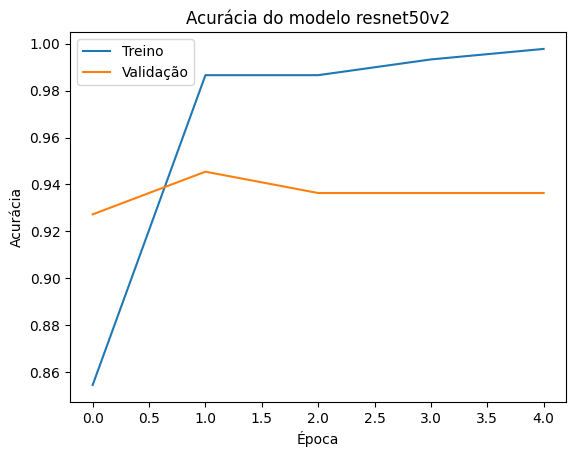

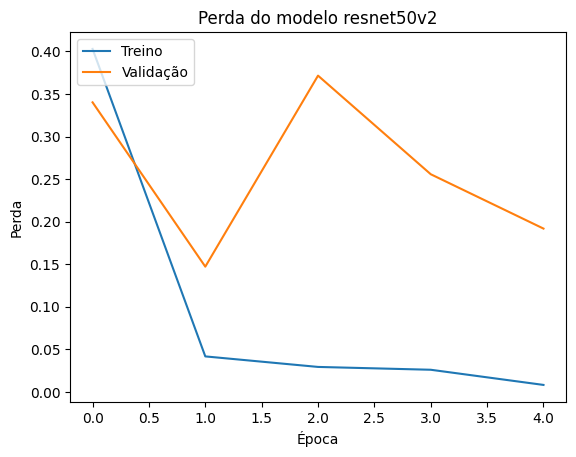

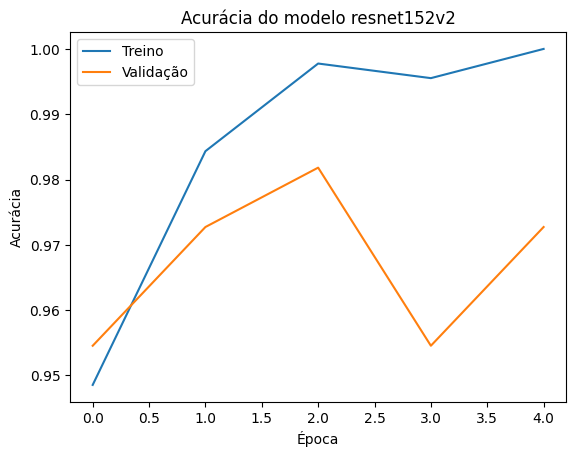

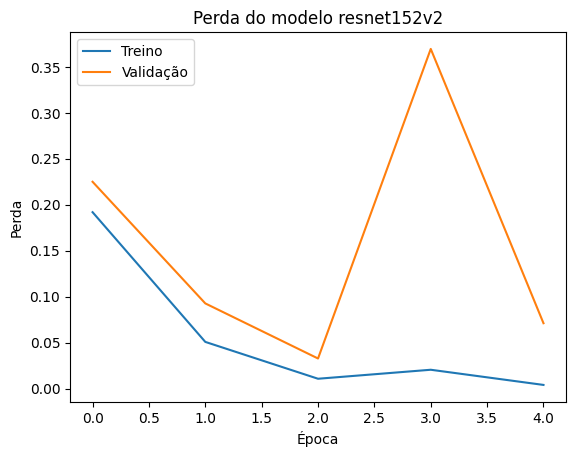

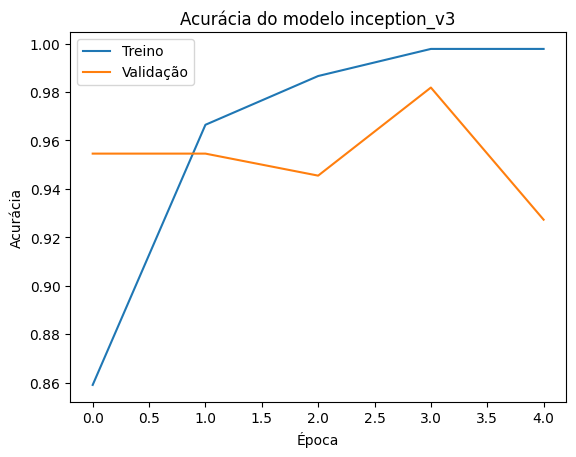

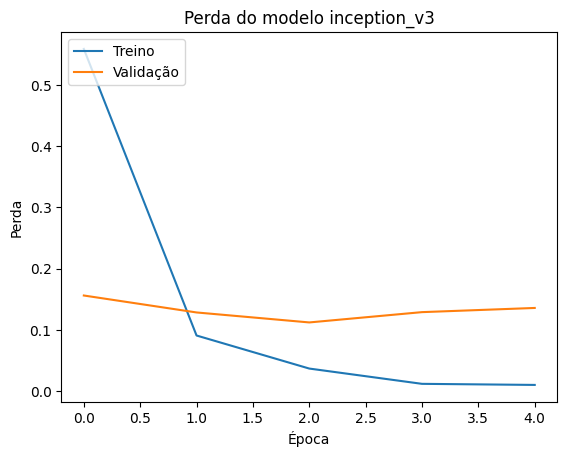

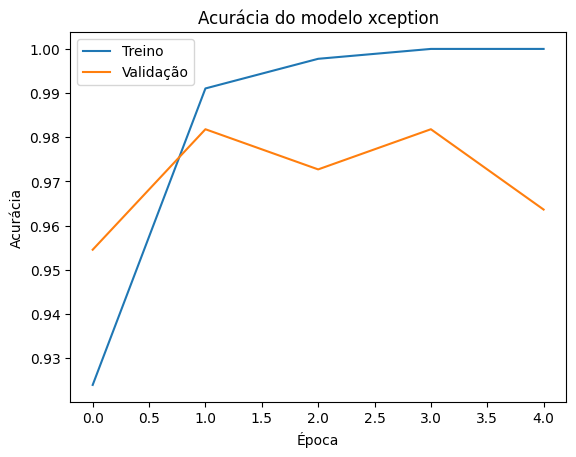

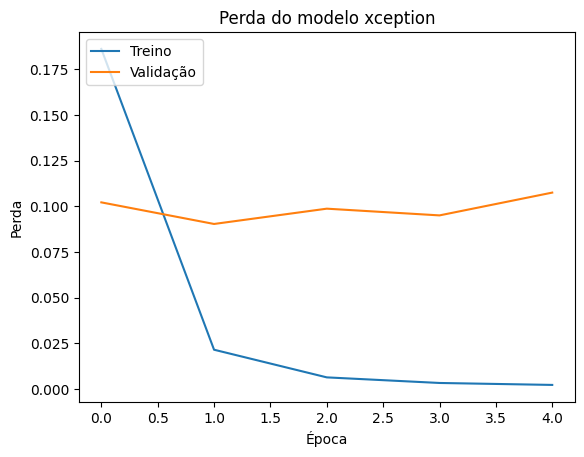

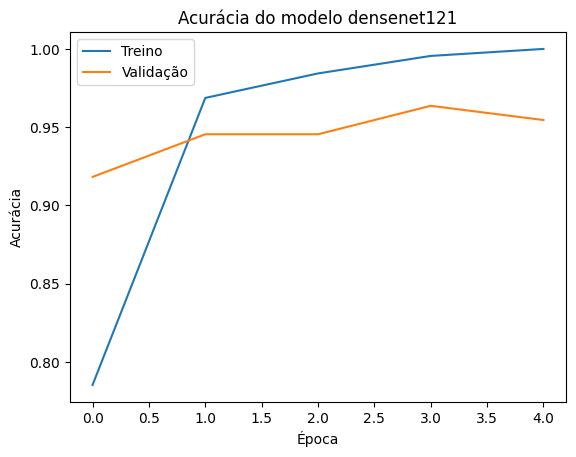

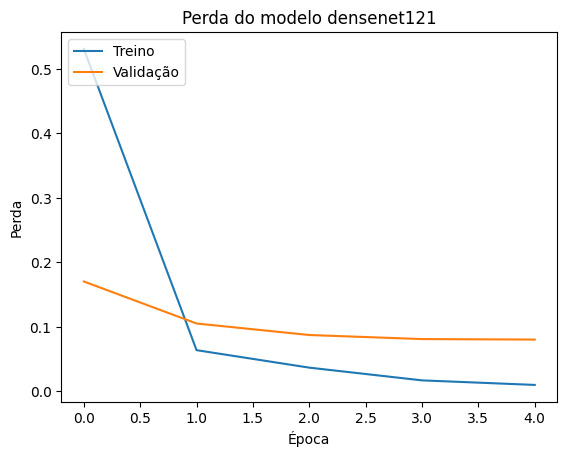

Avaliando resnet50v2 no conjunto de teste...
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.9491 - loss: 0.1839
resnet50v2 - Teste Acurácia: 93.57%
Avaliando resnet152v2 no conjunto de teste...
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.9126 - loss: 0.2914
resnet152v2 - Teste Acurácia: 93.57%
Avaliando inception_v3 no conjunto de teste...
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.9473 - loss: 0.1793
inception_v3 - Teste Acurácia: 93.57%
Avaliando xception no conjunto de teste...
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.9369 - loss: 0.2119
xception - Teste Acurácia: 93.57%
Avaliando densenet121 no conjunto de teste...
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.9486 - loss: 0.1520
densenet121 - Teste Acurácia: 93.57%


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2, ResNet152V2, InceptionV3, Xception, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
import zipfile

# Definições
image_size = (224, 224)
batch_size = 32
epochs = 5

# Nome do arquivo ZIP (coloque o nome correto após o upload)
zip_file = 'catsdogs.zip'

# Diretorio onde será extraído
extract_dir = '/content/catsdogs'

# Crie o diretório, se não existir
os.makedirs(extract_dir, exist_ok=True)

# Extração do arquivo
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Arquivos extraídos em {extract_dir}')


# Caminhos para os diretórios de treino e teste
train_dir = '/content/catsdogs/train'
test_dir = '/content/catsdogs/test'

# Gerador de dados com aumento para treino e normalização para validação/teste
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Função para construir o modelo
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Função para treinar o modelo
def train_model(base_model, train_gen, val_gen, epochs=5):
    model = build_model(base_model)
    for layer in base_model.layers:
        layer.trainable = False  # Congela as camadas do modelo pré-treinado

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_gen,
        epochs=epochs,
        validation_data=val_gen
    )
    return model, history

# Lista de modelos pré-treinados
pretrained_models = [
    ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
]

# Dicionário para guardar históricos de cada modelo
model_histories = {}

# Treinamento dos modelos
for model in pretrained_models:
    model_name = model.name
    print(f'Treinando {model_name}...')
    trained_model, history = train_model(model, train_generator, validation_generator, epochs=epochs)
    model_histories[model_name] = history

# Visualização dos resultados
def plot_history(history, model_name):
    # Plot de acurácia
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Acurácia do modelo {model_name}')
    plt.ylabel('Acurácia')
    plt.xlabel('Época')
    plt.legend(['Treino', 'Validação'], loc='upper left')
    plt.show()

    # Plot de perda
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Perda do modelo {model_name}')
    plt.ylabel('Perda')
    plt.xlabel('Época')
    plt.legend(['Treino', 'Validação'], loc='upper left')
    plt.show()

# Plotar os gráficos de todos os modelos
for model_name, history in model_histories.items():
    plot_history(history, model_name)

# Avaliação final no conjunto de teste
for model_name, history in model_histories.items():
    print(f'Avaliando {model_name} no conjunto de teste...')
    score = trained_model.evaluate(test_generator)
    print(f'{model_name} - Teste Acurácia: {score[1] * 100:.2f}%')
